# Movielens Case Study

In [95]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

<b>Import the three datasets given to us and give the column names as given in the description</b>

In [2]:
# Import ratings Dataset
dfratings = pd.read_csv("D:\\fortray\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
dfratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# Import Movies Dataset
dfmovies = pd.read_csv("D:\\fortray\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')
dfmovies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import users Dataset
dfusers = pd.read_csv("D:\\fortray\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
dfusers.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
dfusers.shape

(6040, 5)

In [6]:
dfratings.shape

(1000209, 4)

In [7]:
dfmovies.shape

(3883, 3)

<b>We can see that the movies dataset and ratings dataset have Movie ID column in common. So we combine both these datsets using merge function.</b> 

In [8]:
dfmovieRatings = dfmovies.merge(dfratings,on='MovieID',how='inner')
dfmovieRatings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
dfmovieRatings.shape

(1000209, 6)

<b>Next we use the combined dataset to merge with the users dataset to form a a master dataset which contains all the column in the three seperate datasets. </b>

In [10]:
dfMaster = dfmovieRatings.merge(dfusers,on="UserID",how='inner')
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [11]:
dfMaster.shape

(1000209, 10)

In [12]:
dfMaster.to_csv("D:\\fortray\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\Master.csv")

<b>Exploratory Data Analysis</b>


In [13]:
#Finding the unique number of items in different columns

In [14]:
dfMaster["Title"].nunique()

3706

In [15]:
dfMaster["Genres"].nunique()

301

<b>1.User Age Distribution</b>

In [16]:
dfMaster["Age"].nunique()

7

In [17]:
#Displaying the unique age groups

In [18]:
dfMaster["Age"].unique()

array([ 1, 50, 25, 35, 18, 45, 56], dtype=int64)

In [19]:
# Users with Different Age Groups
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

<b>We found that the maximum number of users are in the age group 25 (25-34 as per the description given) followed by 35 and 18 respectively. Next we plot this for visualising it.</b>

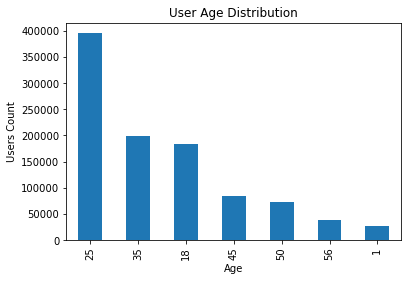

In [20]:
# Plot for users with different age groups
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

<b>Gender Distribution</b>

In [21]:
#Next we find the users by gender.
dfMaster['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

<b>The number of Male users are far more in number when compared with female users. Next we visualize this using bar plot.</b>

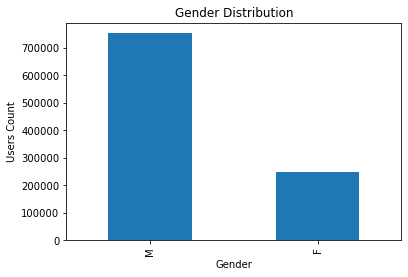

In [22]:
# Plot for users with different genders
dfMaster['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.title("Gender Distribution")
plt.ylabel('Users Count')
plt.show()

<b>2.User rating of the movie “Toy Story”</b>

In [23]:
#We only select the rows that contains Toy Story.
dftoystory=dfMaster[dfMaster['Title'].str.contains("Toy Story")==True]
dftoystory

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [24]:
#We group title(For only toy story) and rating columns so that we can see how many users gave different ratings for the movie toy story.
dftoystory.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

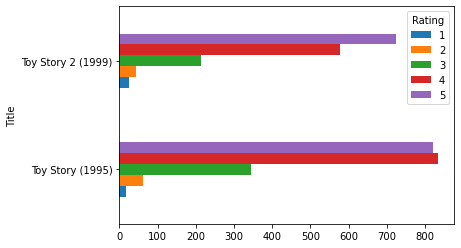

In [25]:
#We plot the above info for better visualization.
dftoystory.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

<b>We can observe that for Toy Story (1995), 16 users rated 1 and 820 users rated 5. In general we can see that for bothh toy story movies the ratings are mostly 4 and 5.So users must have liked the toy story movies very much.</b>

<b> 3.Top 25 movies by viewership rating<b/>

In [26]:
#NExt we find the best rating movies by all user. A movie was rated by different people so we take mean for those ratings. We obtain 25 top rated movies by different users.
High_rated_movies=pd.DataFrame(dfMaster.groupby(["Title","Rating"]).agg("mean")).sort_values(by="Rating",ascending=False).head(25)

In [27]:
High_rated_movies

,,MovieID,UserID,Timestamp,Age,Occupation
Title,Rating,,,,,
eXistenZ (1999),5,2600.0,2613.963636,9.748444e+08,25.254545,7.963636
Dolores Claiborne (1994),5,230.0,2472.085714,9.736208e+08,34.714286,9.171429
Double Indemnity (1944),5,3435.0,3098.365772,9.722398e+08,33.822148,8.144295
Raw Deal (1948),5,1153.0,3446.666667,9.695115e+08,42.000000,7.333333
Double Happiness (1994),5,341.0,2529.100000,9.714145e+08,36.200000,6.300000
"Dorado, El (1967)",5,3487.0,2980.642857,9.736556e+08,33.785714,4.428571
Rawhead Rex (1986),5,2992.0,5954.000000,9.577064e+08,45.000000,11.000000
"Doors, The (1991)",5,1093.0,3234.222222,9.708741e+08,23.625000,8.069444
"Razor's Edge, The (1984)",5,2928.0,3621.000000,9.684777e+08,27.900000,9.400000


In [28]:
High_rated_movies.drop(['MovieID','UserID','Timestamp','Age','Occupation'],axis=1)

,
Title,Rating
eXistenZ (1999),5
Dolores Claiborne (1994),5
Double Indemnity (1944),5
Raw Deal (1948),5
Double Happiness (1994),5
"Dorado, El (1967)",5
Rawhead Rex (1986),5
"Doors, The (1991)",5
"Razor's Edge, The (1984)",5


<b>So above movies are the top rated 25 movies by different users.<b/>

<b> 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696.<b/>

In [29]:
#Selecting the column, userid=2696 and sort values based on ratings.
userid_ = dfMaster[dfMaster["UserID"] == 2696]
userid_.sort_values('Rating',ascending=False,ignore_index=True)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
1,1645,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,2696,4,973308904,M,25,7,24210
2,1783,Palmetto (1998),Film-Noir|Mystery|Thriller,2696,4,973308865,M,25,7,24210
3,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
4,3176,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,2696,4,973308865,M,25,7,24210
5,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
6,2389,Psycho (1998),Crime|Horror|Thriller,2696,4,973308710,M,25,7,24210
7,1892,"Perfect Murder, A (1998)",Mystery|Thriller,2696,4,973308904,M,25,7,24210
8,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
9,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210


<b> The userid=2696, he rated only one movie as 5 and that movie is Lone Star. He is of the age group 25-34.</b>

<b>Feature Engineering</b>

In [30]:
#Splitting the column Genre 
dfGenres = dfMaster['Genres'].str.split("|")
dfGenres 

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [31]:
#Converting te object type into a set so that only uniue items will be present.
listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [32]:
#To turn categorical column (column of labels) into indicator columns 
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")
ratingsOneHot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
#Combining the genre indicator column with our master dataset using merge
dfMaster = pd.merge(dfMaster,ratingsOneHot,how='inner',left_index=True,right_index=True)
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [34]:
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [35]:
dfMaster.to_csv("D:\\fortray\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\Final_Master.csv")

In [36]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

We can see that there are 4 object data types. For machine learning we have to convert into integer numerical data.

In [37]:
#PErforming onehotencoding into gender column and hence converting gender M and F into 1 and 0.
genderencoding=dfMaster['Gender'].str.get_dummies("")
genderencoding

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1000204,0,1
1000205,0,1
1000206,0,1
1000207,0,1


In [38]:
#Combining the gender indicator column with our master dataset using merge
dfMaster = pd.merge(dfMaster,genderencoding,how='inner',left_index=True,right_index=True)
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1,0


In [39]:
#We remove the object columns now.
dfMaster=dfMaster.drop(['Genres','Gender','Zip-code','Title'],axis=1)
dfMaster

,MovieID,UserID,Rating,Timestamp,Age,Occupation,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1,5,978824268,1,10,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,48,1,5,978824351,1,10,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2,150,1,5,978301777,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,260,1,4,978300760,1,10,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,527,1,5,978824195,1,10,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,5727,4,958489970,25,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000205,3535,5727,2,958489970,25,4,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1000206,3536,5727,5,958489902,25,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1000207,3555,5727,3,958490699,25,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [40]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 26 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   MovieID      1000209 non-null  int64
 1   UserID       1000209 non-null  int64
 2   Rating       1000209 non-null  int64
 3   Timestamp    1000209 non-null  int64
 4   Age          1000209 non-null  int64
 5   Occupation   1000209 non-null  int64
 6   Action       1000209 non-null  int64
 7   Adventure    1000209 non-null  int64
 8   Animation    1000209 non-null  int64
 9   Children's   1000209 non-null  int64
 10  Comedy       1000209 non-null  int64
 11  Crime        1000209 non-null  int64
 12  Documentary  1000209 non-null  int64
 13  Drama        1000209 non-null  int64
 14  Fantasy      1000209 non-null  int64
 15  Film-Noir    1000209 non-null  int64
 16  Horror       1000209 non-null  int64
 17  Musical      1000209 non-null  int64
 18  Mystery      1000209 non-null  int64
 19  

<b>We can see that now there are no object data types in the dataframe.</b>

<b>Machine Learning: Now we need to predict the movie ratings using an appropriate model.</b>

In [42]:
#Splitting the dataset into target variable and feature variables.
x=dfMaster.drop(['Rating'],axis=1)
y=dfMaster['Rating']
x

,MovieID,UserID,Timestamp,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1,978824268,1,10,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,48,1,978824351,1,10,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,150,1,978301777,1,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,260,1,978300760,1,10,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,527,1,978824195,1,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,5727,958489970,25,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000205,3535,5727,958489970,25,4,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1000206,3536,5727,958489902,25,4,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1000207,3555,5727,958490699,25,4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [43]:
y

0          5
1          5
2          5
3          4
4          5
          ..
1000204    4
1000205    2
1000206    5
1000207    3
1000208    5
Name: Rating, Length: 1000209, dtype: int64

<b>Now we need to determine the features affecting the ratings of any particular movie.</b>

In [44]:
#We select chi square test to slect the best features to predict the categorical target.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs         Score
2   Timestamp  1.638876e+08
0     MovieID  3.341344e+06
1      UserID  1.720993e+05
3         Age  1.865494e+04
12      Drama  9.705111e+03
15     Horror  9.192491e+03
21        War  6.405101e+03
14  Film-Noir  3.826022e+03
19     Sci-Fi  1.845628e+03
5      Action  1.734519e+03


In [66]:
print('The features affecting the ratings of any particular movie:')
print()
print(Specs.columns)

The features affecting the ratings of any particular movie:



NameError: name 'Specs' is not defined

In [45]:
selected_features_df=dfMaster[['Timestamp','MovieID','UserID','Age','Drama','Horror','War','Film-Noir','Sci-Fi','Action']]
selected_features_df

,Timestamp,MovieID,UserID,Age,Drama,Horror,War,Film-Noir,Sci-Fi,Action
0,978824268,1,1,1,0,0,0,0,0,0
1,978824351,48,1,1,0,0,0,0,0,0
2,978301777,150,1,1,1,0,0,0,0,0
3,978300760,260,1,1,0,0,0,0,1,1
4,978824195,527,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1000204,958489970,3513,5727,25,1,0,0,0,0,0
1000205,958489970,3535,5727,25,0,1,0,0,0,0
1000206,958489902,3536,5727,25,0,0,0,0,0,0
1000207,958490699,3555,5727,25,0,0,0,0,0,1


In [67]:
#Create train and test data set
x_train,x_test,y_train,y_test = train_test_split(selected_features_df,y,test_size=0.33,random_state=42)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((670140, 10), (330069, 10), (670140,), (330069,))

Now we try some machine learning models to predict the target using our select features and then choose the model which gives the most accurate results.

In [99]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
Y_pred = logreg.predict(x_test)
#acc_log = round(logreg.score(y_test, Y_pred) * 100, 2)
#acc_log
metrics.confusion_matrix(y_test,Y_pred)

array([[     0,      0,      0,  18539,      0],
       [     0,      0,      0,  35364,      0],
       [     0,      0,      0,  86149,      0],
       [     0,      0,      0, 115133,      0],
       [     0,      0,      0,  74884,      0]], dtype=int64)

In [100]:
metrics.accuracy_score(y_test,Y_pred)

0.3488149447539757

In [101]:
print(classification_report(y_test,Y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     18539
           2       0.00      0.00      0.00     35364
           3       0.00      0.00      0.00     86149
           4       0.35      1.00      0.52    115133
           5       0.00      0.00      0.00     74884

    accuracy                           0.35    330069
   macro avg       0.07      0.20      0.10    330069
weighted avg       0.12      0.35      0.18    330069



In [103]:
logreg.coef_

array([[-1.11220234e-09, -1.77167762e-15, -3.65853412e-15,
        -4.19785941e-17, -8.84863267e-19,  1.89768397e-19,
        -1.63526997e-19, -6.91811908e-20, -4.57841660e-20,
        -1.58965333e-19],
       [-4.41737638e-10, -3.75293437e-16, -1.77593437e-15,
        -2.09327127e-17, -7.23333810e-19,  1.96942715e-19,
        -1.89266010e-19, -7.90218088e-20,  1.31962597e-19,
         1.06980874e-19],
       [ 4.68799756e-10,  1.70545727e-15,  1.44264213e-15,
         1.40388878e-17, -3.04329743e-19,  1.20721930e-19,
        -2.19708485e-19, -8.39405063e-20,  1.89760376e-19,
         3.35652656e-19],
       [ 7.66378989e-10,  1.72055421e-15,  2.56492907e-15,
         3.22393735e-17,  7.86384265e-19, -2.27986671e-19,
         6.66781582e-20,  4.84191936e-20, -1.27158654e-19,
        -5.47006793e-21],
       [ 3.18761238e-10, -1.27904041e-15,  1.42689729e-15,
         1.66330455e-17,  1.12614256e-18, -2.79446371e-19,
         5.05823334e-19,  1.83724312e-19, -1.48780152e-19,
        -2.

In [104]:
logreg.intercept_

array([-1.14513712e-18, -4.58974156e-19,  4.78501479e-19,  7.88289593e-19,
        3.37320205e-19])

In [105]:
selected_features_df.columns

Index(['Timestamp', 'MovieID', 'UserID', 'Age', 'Drama', 'Horror', 'War',
       'Film-Noir', 'Sci-Fi', 'Action'],
      dtype='object')

In [106]:
logreg.predict_proba(x_test)

array([[0.05584876, 0.10746447, 0.26139538, 0.34951041, 0.22578097],
       [0.05598364, 0.10760513, 0.26134536, 0.34927233, 0.22579354],
       [0.0547915 , 0.10635528, 0.26178531, 0.35139182, 0.22567609],
       ...,
       [0.05579774, 0.10741122, 0.26141429, 0.34960059, 0.22577616],
       [0.05591795, 0.10753665, 0.26136973, 0.34938823, 0.22578744],
       [0.05569872, 0.10730777, 0.26145096, 0.34977578, 0.22576677]])

<b>Logistic Regression gives an accuracy score of 34%.</b>

In [111]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
GN = GaussianNB().fit(x_train, y_train) 
GN_predictions = GN.predict(x_test) 
  
# accuracy on X_test 
accuracy = GN.score(x_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, GN_predictions) 

accuracy

0.3473849407245152

<b>Naive Bayes gives an accuracy score of 34%.</b>

In [112]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 8).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy

0.3583735521966619

<b>KNN gives an accuracy score of 35%.</b>

In [110]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)
# Model Accuracy, how often is the classifier correct?
Accuracy=accuracy_score(Y_pred,y_test)
print(Accuracy)

0.31738212313183


<b>Decision tree gives an accuracy score of 35%.</b>

<b>Out of the machine learning models we tried, best accuracy was given by K Nearest Neighbour(KNN). So we select KNN for predicting our target variable.</b>